In [8]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
from idtxl.multivariate_mi import MultivariateMI
from idtxl.data import Data

import numpy as np
import matplotlib.pyplot as plt
import scipy.io

import seaborn as sns
import utils as ut
import warnings
warnings.filterwarnings("ignore")

from scipy.stats import pearsonr

from matplotlib import font_manager
from visual_config import *

for font in font_manager.findSystemFonts("figures/Atkinson_Typeface/"):
    font_manager.fontManager.addfont(font)

set_visual_style()

In [10]:
SEED = 2023

In [11]:
consensus_mat = scipy.io.loadmat(
    "Consensus_Connectomes.mat",
    simplify_cells=True,
    squeeze_me=True,
    chars_as_strings=True,
)

In [12]:
connectivity = ut.spectral_normalization(
    1, consensus_mat["LauConsensus"]["Matrices"][2][0]
)

In [13]:
n_nodes = connectivity.shape[0]
delta = 0.01
tau = 0.02

G = 0.74
duration = 1
noise_strength = 0.05
trials = 32
dynamics = np.zeros((n_nodes, int(duration / delta) + 1, trials))
noise = np.zeros_like(dynamics)
for trial in range(trials):
    rng = np.random.default_rng(seed=SEED+trial)
    for i in range(int(duration / delta) + 1):
        noise[:, i, trial] = rng.normal(0, noise_strength, (n_nodes,))   
    dynamics[:,:,trial] = ut.simulate_dynamical_system_parallel(
    adjacency_matrix=connectivity,
    coupling=G,
    dt=delta,
    timeconstant=tau,
    input_matrix=noise[:,:,trial],
    duration=duration,
    )

In [14]:
data = Data(dynamics, dim_order="psr")
network_analysis = MultivariateMI()
settings = {'cmi_estimator': 'JidtGaussianCMI',
            'max_lag_sources': 2,
            'min_lag_sources': 1}
# results = network_analysis.analyse_single_target(settings=settings, data=data,target=0)

Adding data with properties: 219 processes, 101 samples, 32 replications
overwriting existing data


In [15]:
from joblib import Parallel, delayed
def parallel_idtxl(data,target,network_analysis,estimation_settings):
    return network_analysis.analyse_single_target(settings=estimation_settings, data=data,target=target)


results = Parallel(n_jobs=-1)(delayed(network_analysis.analyse_single_target)(settings=settings, data=data,target=i) for i in range(4))


PrettyTable is not available on this system. Install it from https://pypi.org/project/PrettyTable/ to use the Goettinge PID estimator.

ECOS is not available on this system. Install it from https://pypi.python.org/pypi/ecos to use The Tartu cone programming PID estimator.

PrettyTable is not available on this system. Install it from https://pypi.org/project/PrettyTable/ to use the Goettinge PID estimator.

ECOS is not available on this system. Install it from https://pypi.python.org/pypi/ecos to use The Tartu cone programming PID estimator.

PrettyTable is not available on this system. Install it from https://pypi.org/project/PrettyTable/ to use the Goettinge PID estimator.

ECOS is not available on this system. Install it from https://pypi.python.org/pypi/ecos to use The Tartu cone programming PID estimator.

PrettyTable is not available on this system. Install it from https://pypi.org/project/PrettyTable/ to use the Goettinge PID estimator.

ECOS is not available on this system. Inst

  File "/home/kayson/anaconda3/envs/communicability/lib/python3.9/site-packages/idtxl/pid_goettingen.py", line 7, in <module>
    from prettytable import PrettyTable
  File "/home/kayson/anaconda3/envs/communicability/lib/python3.9/site-packages/idtxl/synergy_tartu.py", line 32, in <module>
    import ecos
  File "/home/kayson/anaconda3/envs/communicability/lib/python3.9/site-packages/idtxl/pid_goettingen.py", line 7, in <module>
    from prettytable import PrettyTable
  File "/home/kayson/anaconda3/envs/communicability/lib/python3.9/site-packages/idtxl/synergy_tartu.py", line 32, in <module>
    import ecos
  File "/home/kayson/anaconda3/envs/communicability/lib/python3.9/site-packages/idtxl/pid_goettingen.py", line 7, in <module>
    from prettytable import PrettyTable
  File "/home/kayson/anaconda3/envs/communicability/lib/python3.9/site-packages/idtxl/synergy_tartu.py", line 32, in <module>
    import ecos
  File "/home/kayson/anaconda3/envs/communicability/lib/python3.9/site-packa


Target: 1 - testing sources [0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216

In [16]:
results

In [36]:
results[3].get_single_target(3,fdr=False)

{'sources_tested': [0,
  1,
  2,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156

In [35]:
results[1].targets_analysed

[1]

In [38]:
from copy import copy
test = copy(results[0])

In [40]:
test.combine_results(*results[1:])

In [47]:
adj = test.get_adjacency_matrix(weights='max_te_lag', fdr=False)

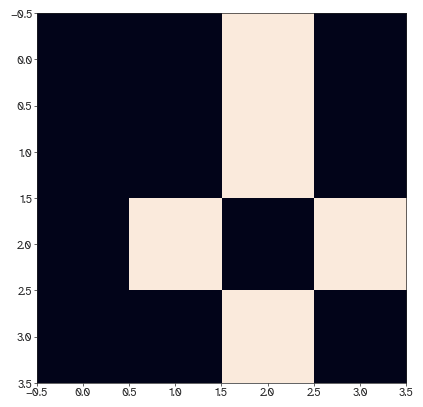

In [50]:
plt.imshow(adj.weight_matrix[:4,:4])

In [51]:
adj.print_matrix()

[[False False  True ... False False False]
 [False False  True ... False False False]
 [False  True False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
[[0 0 1 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [55]:
mat = np.zeros((5,5))
mat

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [59]:
mat = np.array([[0,1,0,1,0],
       [1,0,1,0,0],
       [0,1,0,0,0],
       [1,0,0,0,1],
       [0,0,0,1,0]])

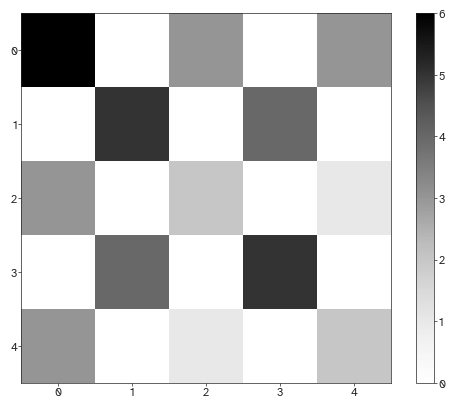

In [74]:
plt.imshow(np.linalg.matrix_power(mat, 4),cmap='Greys')
plt.colorbar()

In [61]:
mat**0

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]])